# IPL Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
##merging
# matches = pd.read_csv("ipl_dataset.csv")
# deliveries = pd.read_csv("deliveries.csv")
# ipl = pd.merge(matches, deliveries, left_on="id", right_on="match_id").drop('match_id', axis=1)
ipl = pd.read_csv('ipl_dataset.csv')

In [3]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [4]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
ipl[pd.isnull(ipl['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [7]:
ipl['winner'].fillna('tie', inplace=True)

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
ipl.replace(['Delhi Daredevils'],['Delhi Capitals'],inplace=True)

In [10]:
ipl.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DCS','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DCS':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DCS':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DCS':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DCS':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'tie':15},
         'toss_decision' : {'field':0,'bat':1}
         }

ipl.replace(encode, inplace=True)
ipl.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,0,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,0,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,0,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,0,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,1,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,8,10,10,0,normal,0,10,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,2,1,1,0,normal,0,1,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,3,9,3,1,normal,0,9,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,7,11,11,0,normal,0,7,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,10,1,1,0,normal,0,1,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [11]:
ipl[pd.isnull(ipl['city'])]
ipl['city'].fillna('Dubai',inplace=True)

In [12]:
# cities=pd.unique(ipl[['city']].values.ravel('K'))
stadium=pd.unique(ipl[['venue']].values.ravel('K'))
stadium

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [13]:
# selecting required columns
ipl = ipl[['team1','team2','toss_winner','toss_decision','venue','winner']]

In [14]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    int64 
 1   team2          756 non-null    int64 
 2   toss_winner    756 non-null    int64 
 3   toss_decision  756 non-null    int64 
 4   venue          756 non-null    object
 5   winner         756 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 32.5+ KB


In [15]:
## FOR LABELING LONG STRING HOLDING COLUMNS
from sklearn.preprocessing import LabelEncoder
var_mod = ['venue']
le = LabelEncoder()
for i in var_mod:
    ipl[i] = le.fit_transform(ipl[i]).astype(np.int64)
ipl.dtypes

team1            int64
team2            int64
toss_winner      int64
toss_decision    int64
venue            int64
winner           int64
dtype: object

In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11E812F0>,
      dtype=object)

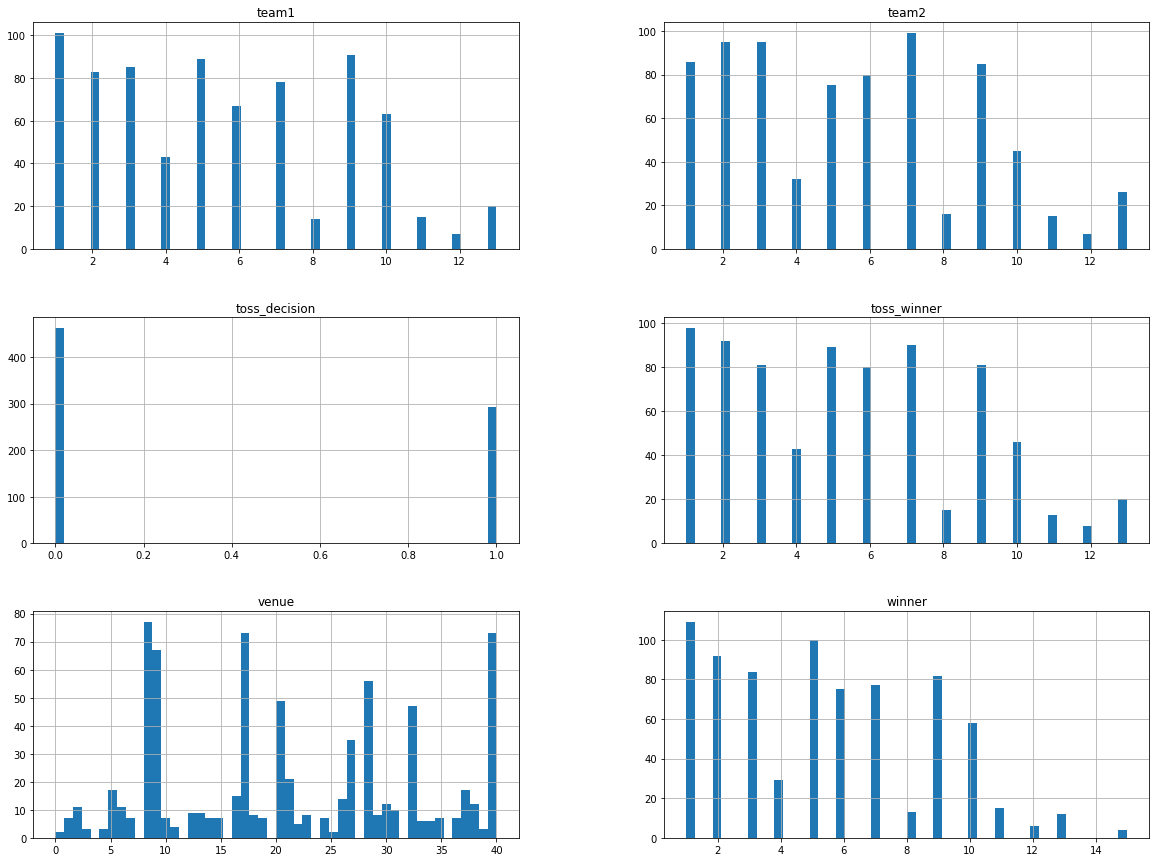

In [18]:
ipl.hist(bins=50,figsize=(20,15))

In [19]:
# ipl["dl_applied"].value_counts()

## Train Test Splitting

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_test, test_test = train_test_split(ipl, test_size=0.2,random_state=11)

In [22]:
ipl = train_test.copy()

## Looking for correlation

In [23]:
corr_matrix = ipl.corr()
corr_matrix['winner'].sort_values(ascending=False)

winner           1.000000
team2            0.441084
team1            0.424762
toss_winner      0.387566
venue            0.056384
toss_decision   -0.073366
Name: winner, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B08DE90>,
      dtype=object)

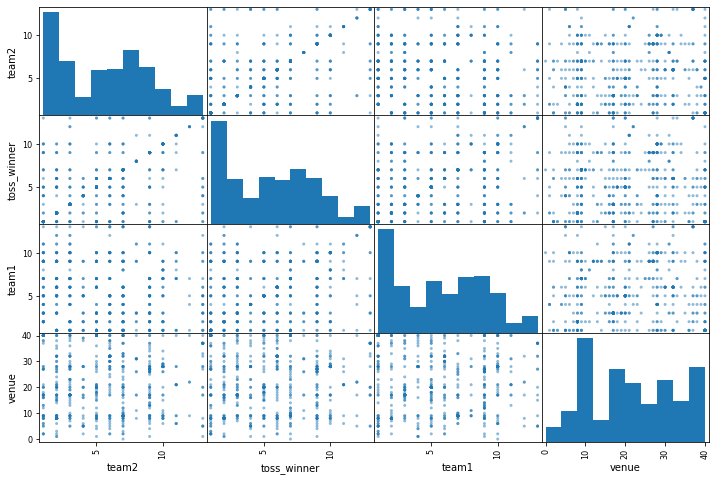

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["team2","toss_winner","team1","venue"]
scatter_matrix(ipl[attributes],figsize=(12,8))

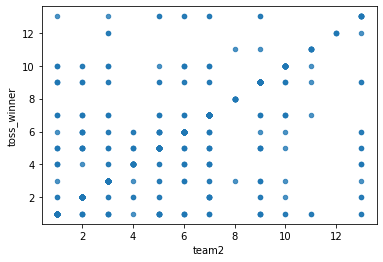

In [25]:
ipl.plot(kind = "scatter", x="team2", y="toss_winner", alpha=0.8)

In [26]:
teams = encode['winner']
toss= encode['toss_decision']
print(teams['MI'])

1


In [27]:
ipl_new = ipl.drop("winner",axis=1)
ipl_labels = ipl["winner"].copy()

## Model Selection

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# model = DecisionTreeClassifier()
# model = KNeighborsClassifier()
# model = LinearRegression() #- shows more error of 23.86
model = RandomForestClassifier()
model.fit(ipl_new,ipl_labels)

RandomForestClassifier()

In [29]:
some_data = ipl_new.iloc[:5]
some_labels = ipl_labels[:5]
model.predict(some_data)

array([5, 3, 5, 9, 9], dtype=int64)

In [30]:
from sklearn.metrics import mean_squared_error
ipl_predictions = model.predict(ipl_new)
mse = mean_squared_error(ipl_labels,ipl_predictions)
rmse = np.sqrt(mse)

In [31]:
rmse

1.6568141454559053

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,ipl_new,ipl_labels,scoring="neg_mean_squared_error",cv=5) #cv is 10 folds
rmse_scores = np.sqrt(-scores)

c:\users\raees\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [33]:
rmse_scores

array([3.4795744 , 3.30539254, 3.68153759, 3.57793976, 2.9538111 ])

In [34]:
def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard Deviation:",scores.std())

In [35]:
print_scores(rmse_scores)

Scores :  [3.4795744  3.30539254 3.68153759 3.57793976 2.9538111 ]
Mean :  3.3996510761341674
Standard Deviation: 0.25506569928749256


In [36]:
X_test = ipl.drop("winner",axis=1)
y_test = ipl["winner"].copy()
final_predictions = model.predict(X_test)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [37]:
y_test.head()

409    5
556    3
537    5
255    9
150    9
Name: winner, dtype: int64

In [38]:
print(final_predictions[:5])

[5 3 5 9 9]


In [39]:
final_mse

2.7450331125827816

In [40]:
final_rmse

1.6568141454559053

In [41]:
print(y_test[:5])

409    5
556    3
537    5
255    9
150    9
Name: winner, dtype: int64


In [42]:
print(X_test[::2])

     team1  team2  toss_winner  toss_decision  venue
409      6      5            6              1     20
537      5      3            3              0     17
150      4      9            9              0      4
622      1      7            7              0      6
440      3      2            2              0     15
..     ...    ...          ...            ...    ...
604     11      1            1              0     21
583     10      2           10              1     28
332      9      3            3              0     27
337      3      6            6              0     32
80       9      2            9              1     27

[302 rows x 5 columns]


In [43]:
team1 = 'CSK'
team2 = 'MI'
toss_winner = 'CSK'
toss_decision = 'field'
venue = 28
input = [teams[team1],teams[team2],teams[toss_winner],toss[toss_decision],venue]
features = np.array([input])
output=model.predict(features)

In [44]:
print(list(teams.keys())[list(teams.values()).index(output)])

MI


In [45]:
from sklearn.metrics import accuracy_score
acr = accuracy_score(y_test,final_predictions)

In [46]:
print("Accuracy",acr*100)

Accuracy 87.74834437086093


In [47]:
finals = pd.DataFrame()

In [48]:
finals['Team 1'] = X_test.iloc[:,0]
finals['Team 2'] = X_test.iloc[:,1]
finals['Winner'] = final_predictions
finals['Stadium'] =X_test.iloc[:,4]

In [50]:
vals = [i for i in range(0,41)]
finals['Stadium'] = finals['Stadium'].replace(to_replace=vals, value=stadium)
finals=finals.replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12,13,14], value=teams)

In [51]:
finals

,Team 1,Team 2,Winner,Stadium
409,RR,CSK,CSK,De Beers Diamond Oval
556,RCB,KXIP,RCB,SuperSport Park
537,CSK,RCB,CSK,SuperSport Park
255,KXIP,RR,KXIP,Nehru Stadium
150,DC,KXIP,KXIP,M Chinnaswamy Stadium
...,...,...,...,...
269,KXIP,KKR,KKR,"Punjab Cricket Association IS Bindra Stadium, ..."
337,RCB,RR,RR,Sheikh Zayed Stadium
91,KKR,DC,KKR,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
80,KXIP,KKR,KXIP,Nehru Stadium


In [52]:
from joblib import dump, load

In [53]:
dump(model,'ipl_predictor.joblib')

['ipl_predictor.joblib']

In [54]:
import pickle

In [55]:
pickle.dump(model,open('ipl_predictor.pkl','wb'))

In [56]:
outs = model.predict(np.array([[5,1,5,1,6]]))

In [57]:
outs

array([5], dtype=int64)

In [58]:
print(list(teams.keys())[list(teams.values()).index(outs)])

CSK


In [68]:
X_test['venue'].head()

409    20
556    17
537    17
255    27
150     4
Name: venue, dtype: int64

In [70]:
X_test["venue"]

409    20
556    17
537    17
255    27
150     4
       ..
269     8
337    32
91     28
80     27
703    29
Name: venue, Length: 604, dtype: int64